In [1]:
## imports
import pandas as pd
import numpy as np
import seaborn as sns

## import the plotnine package
## make sure it's installed
## if not installed, can use
## ! pip install plotnine
# import plotnine
# from plotnine import *

import matplotlib.pyplot as plt #loading the library

# A few plot types

## Load DC crime data

In [3]:
## load data on 2020 crimes in DC
df = dc_crim_2020 = pd.read_csv("https://opendata.arcgis.com/datasets/f516e0dd7b614b088ad781b0c4002331_2.csv")

## Plot type one: bar plot

**Goal**: bar plot where x axis is what shift it is; y axis is the count of unique crime reports (using `OBJECT_ID` as unique indicator)

In [5]:
## step one: create the summary we want to plot
C = count_byshift = pd.DataFrame(df.groupby('SHIFT')['OBJECTID'].nunique()).reset_index()
count_byshift

,SHIFT,OBJECTID
0,DAY,10094
1,EVENING,12324
2,MIDNIGHT,5513


#### Explore the data: Make a simple graph and see if you need it

([<matplotlib.axis.XTick at 0x1769f3d10>,
 [Text(0, 0, 'DAY'), Text(1, 0, 'EVENING'), Text(2, 0, 'MIDNIGHT')])

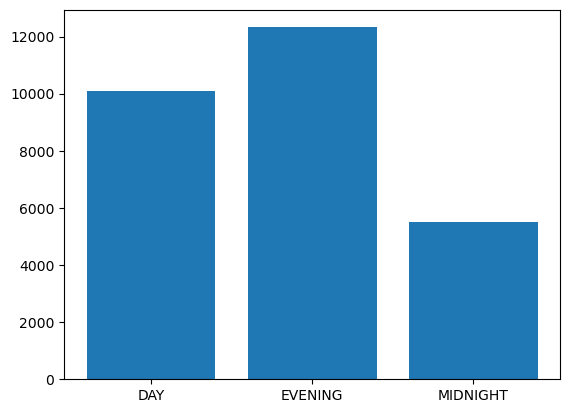

In [8]:
plt.bar(C.index, C.OBJECTID)
plt.xticks(C.index, C.SHIFT)

#### Make the graph look pretty

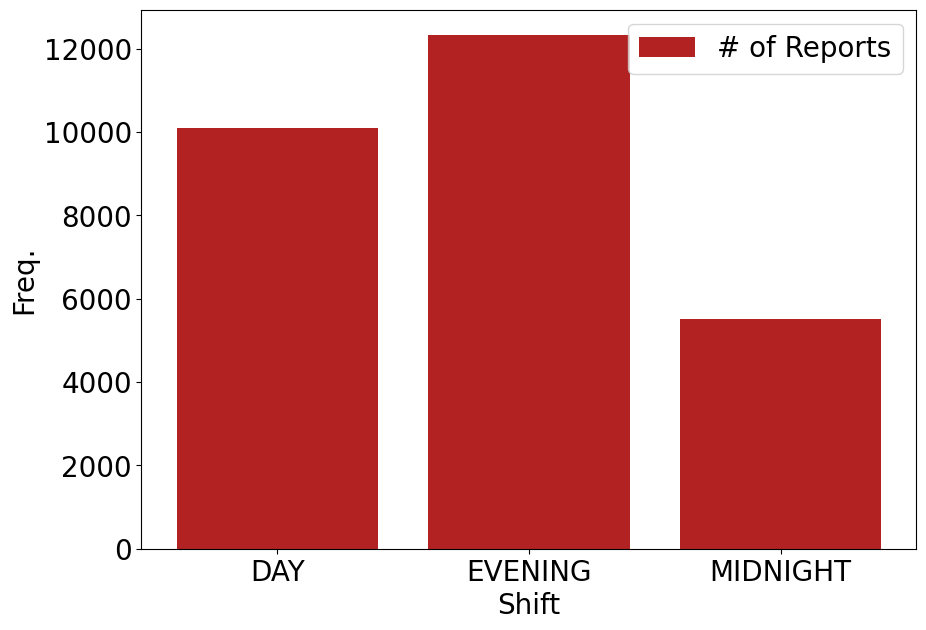

In [10]:
plt.figure(figsize=(10,7)) # Define the size of the graph

plt.bar(C.index, C.OBJECTID, label = "# of Reports", 
        color="firebrick") # Define the figure object

plt.xticks(C.index, C.SHIFT, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Shift", fontsize=20)
plt.ylabel("Freq.", fontsize=20)

plt.legend(fontsize=20)

plt.savefig("barplot.png", bbox_inches="tight")

#### Try it yourself with METHOD
Create a bar chart on the METHOD column.
Named colors: https://matplotlib.org/stable/gallery/color/named_colors.html

In [75]:
m = method_counts = df.METHOD.value_counts().reset_index()
m

,METHOD,count
0,OTHERS,25256
1,GUN,2034
2,KNIFE,641


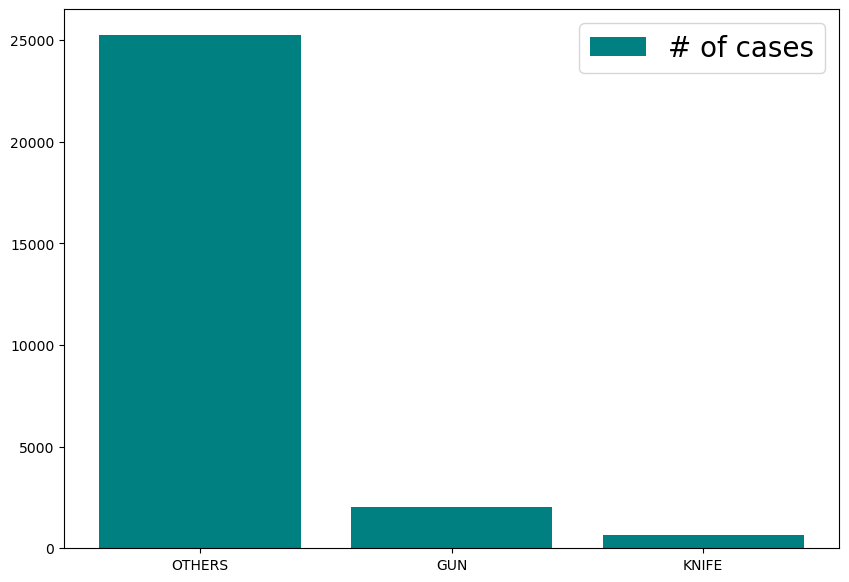

In [89]:
plt.figure(figsize=(10,7)) 
plt.bar(m["METHOD"],m["count"],label="# of cases",color="teal")
plt.xticks(m.index, m.METHOD)
plt.legend(fontsize=20)

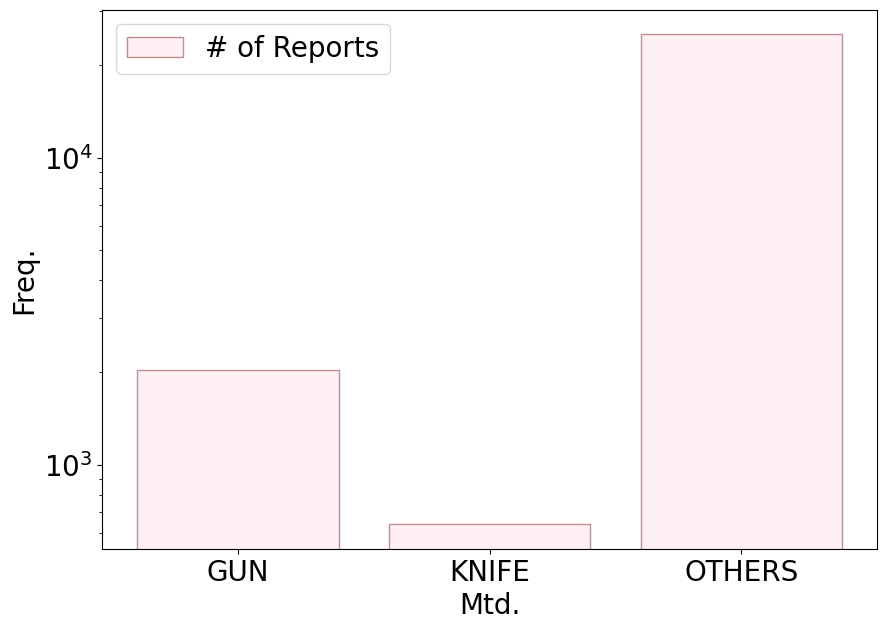

In [110]:
M = count_bymtd = pd.DataFrame(df.groupby('METHOD')['OBJECTID'].nunique()).reset_index()
plt.figure(figsize=(10,7)) # Define the size of the graph
plt.bar(M.index, M.OBJECTID, label = "# of Reports", color="lavenderblush", edgecolor = "rosybrown") # Define the figure object
plt.xticks(M.index, M.METHOD, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Mtd.", fontsize=20)
plt.ylabel("Freq.", fontsize=20)
plt.legend(fontsize=20)
plt.savefig("barplot_practice.png", bbox_inches="tight")

plt.yscale("log")#scale it down

# Histograms and Densities

In [ ]:
plt.hist( df.X, bins=20 )

<Axes: xlabel='X', ylabel='Density'>

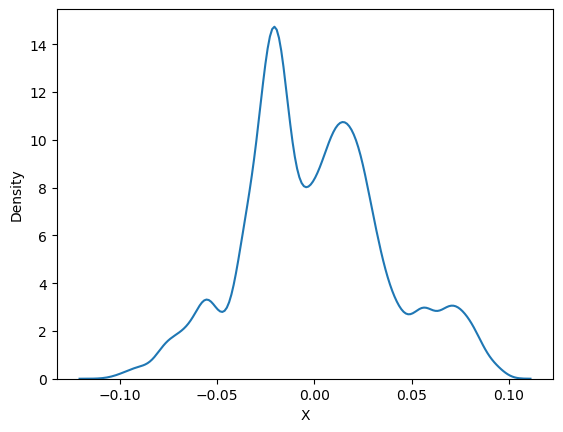

In [12]:
sns.kdeplot( df.X - df.X.mean()) # subtract the mean to shift it toward the same thing and easier to see distribution

<Axes: xlabel='Y', ylabel='Density'>

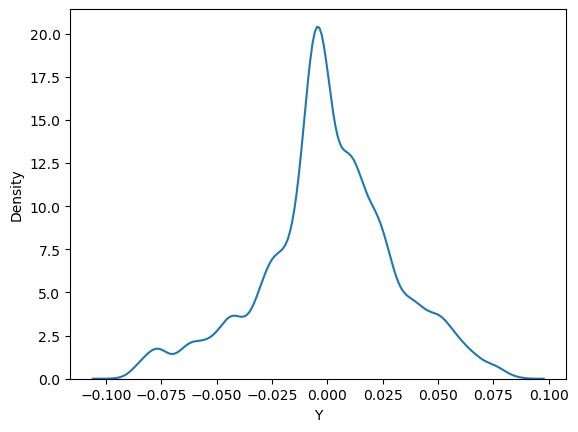

In [14]:
sns.kdeplot( df.Y - df.Y.mean())

<Axes: xlabel='X', ylabel='Density'>

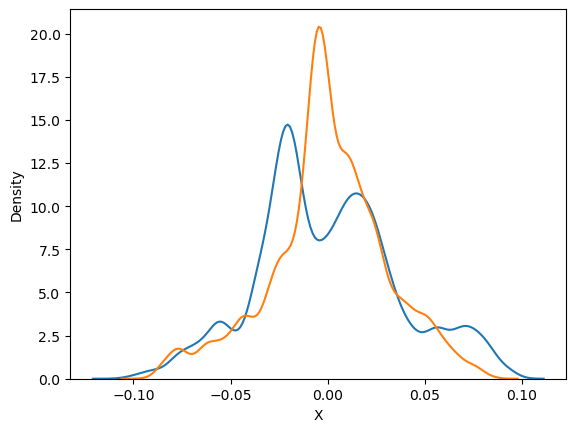

In [41]:
sns.kdeplot( df.X - df.X.mean())
sns.kdeplot( df.Y - df.Y.mean())

#### Your Turn: Add labels (X and Y), plot the legend, and change the color of your density
- What are the differences in distribution you observe?

SyntaxError: invalid character '‘' (U+2018) (983846771.py, line 2)

## Two dimensional density plots

<Axes: xlabel='X', ylabel='Y'>

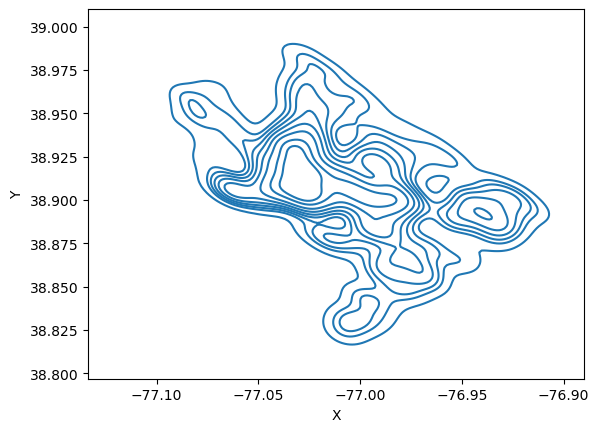

In [20]:
sns.kdeplot(x = df.X, y = df.Y)

#### Your turn: Plot the densities for WARDS 1, 2, and 3

- Sample 100 for each ward.
- Should take six lines of code. Hint: Do it for 1 first.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


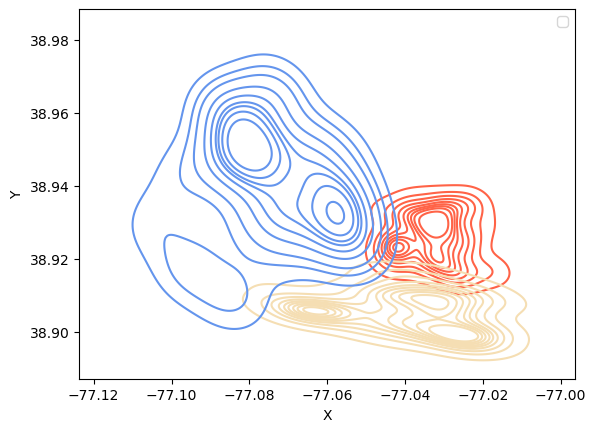

<Figure size 1000x700 with 0 Axes>

In [126]:
df1 = df[df.WARD == 1].sample(100)
df2 = df[df.WARD == 2].sample(100)
df3 = df[df.WARD == 3].sample(100)
sns.kdeplot(x = df1.X, y = df1.Y, color = 'tomato', label = 'ward1')
sns.kdeplot(x = df2.X, y = df2.Y, color = 'wheat', label = 'ward2')
sns.kdeplot(x = df3.X, y = df3.Y, color = 'cornflowerblue', label = 'ward3')
plt.legend(fontsize=10)
plt.figure(figsize=(10,7))
plt.show()

# Line Plots
**Goal**: bar plot where x axis is month; y axis is the count of unique crime reports (using `OBJECT_ID` as unique indicator); want line graph to be able to see trends over time in count of reported crimes

In [31]:
df['report_month'] = pd.to_datetime(df.REPORT_DAT).dt.month
df[["REPORT_DAT", "report_month"]].sample(n = 3)

,REPORT_DAT,report_month
26533,2020/01/28 00:43:22+00,1
14065,2020/10/22 19:54:57+00,10
20664,2020/06/10 21:11:32+00,6


In [37]:
df.sample(frac=.1) #returns 1/10 of the data but randomly

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID,report_month
17806,-77.080318,38.950208,20030932,2020/02/20 17:39:51+00,DAY,OTHERS,THEFT F/AUTO,4600 - 4699 BLOCK OF 41ST STREET NW,393038.00,142481.00,...,1100.0,Precinct 32,38.950200,-77.080316,NaN,2020/02/19 15:30:18+00,2020/02/20 17:34:53+00,595896262,NaN,2
14478,-76.968749,38.875120,20183566,2020/12/28 22:24:07+00,EVENING,GUN,ROBBERY,2500 - 2599 BLOCK OF N STREET SE,402712.00,134143.00,...,7709.0,Precinct 111,38.875112,-76.968746,NaN,2020/12/28 21:21:24+00,2020/12/28 21:22:19+00,595855963,NaN,12
10293,-77.032796,38.902531,20080260,2020/05/31 10:10:37+00,MIDNIGHT,OTHERS,BURGLARY,1400 - 1433 BLOCK OF K STREET NW,397155.47,137185.86,...,10100.0,Precinct 129,38.902523,-77.032793,DOWNTOWN,2020/05/31 06:35:07+00,NaN,595834845,NaN,5
13409,-77.075315,38.964453,20177084,2020/12/14 12:28:55+00,DAY,OTHERS,THEFT F/AUTO,5523 - 5599 BLOCK OF CONNECTICUT AVENUE NW,393473.00,144062.00,...,1100.0,Precinct 32,38.964445,-77.075313,NaN,2020/12/13 11:00:08+00,2020/12/13 23:01:16+00,595846603,NaN,12
25141,-77.049482,38.900706,20002983,2020/01/06 02:42:22+00,EVENING,OTHERS,THEFT/OTHER,2200 - 2299 BLOCK OF I STREET NW,395708.00,136984.00,...,10800.0,Precinct 2,38.900698,-77.049479,NaN,2020/01/06 01:00:37+00,2020/01/06 02:00:31+00,596075246,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16651,-77.034578,38.904693,20000165,2020/01/01 08:36:44+00,MIDNIGHT,OTHERS,THEFT/OTHER,1100 - 1199 BLOCK OF 15TH STREET NW,397001.00,137426.00,...,10100.0,Precinct 17,38.904686,-77.034575,DOWNTOWN,2020/01/01 07:46:40+00,2020/01/01 08:37:03+00,595887248,NaN,1
26187,-77.060457,38.942058,20122108,2020/08/27 00:59:24+00,EVENING,OTHERS,MOTOR VEHICLE THEFT,2900 - 2999 BLOCK OF UPTON STREET NW,394759.00,141575.00,...,1303.0,Precinct 34,38.942051,-77.060455,NaN,2020/08/26 00:00:36+00,2020/08/27 00:00:41+00,596077500,NaN,8
1748,-77.040849,38.903745,20081184,2020/06/01 19:39:48+00,EVENING,OTHERS,BURGLARY,1718 - 1799 BLOCK OF L STREET NW,396457.00,137321.00,...,10700.0,Precinct 17,38.903738,-77.040847,GOLDEN TRIANGLE,2020/06/01 17:10:00+00,2020/06/01 19:19:11+00,595564845,NaN,6
6137,-76.968980,38.873633,20168342,2020/11/25 22:49:51+00,EVENING,OTHERS,MOTOR VEHICLE THEFT,1300 - 1399 BLOCK OF 27TH STREET SE,402692.00,133978.00,...,7709.0,Precinct 111,38.873626,-76.968978,NaN,2020/11/25 19:50:38+00,2020/11/25 22:47:31+00,595571817,NaN,11


In [33]:
#USEFUL FOR HW
pd.to_datetime(df.REPORT_DAT).dt.year

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
27926    2020
27927    2020
27928    2020
27929    2020
27930    2020
Name: REPORT_DAT, Length: 27931, dtype: int32

In [35]:
### Group by month and find unique reports; same syntax as above

C = count_bymonth = df.groupby('report_month')['OBJECTID'].nunique().reset_index()
C

,report_month,OBJECTID
0,1,2950
1,2,2540
2,3,2202
3,4,1652
4,5,1834
5,6,2276
6,7,2134
7,8,2433
8,9,2570
9,10,2563


(0.0, 4000.0)

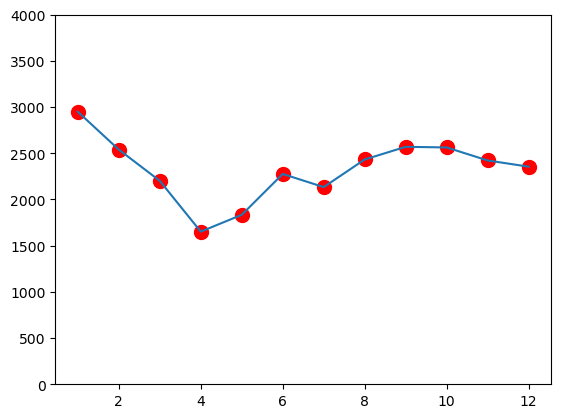

In [39]:
plt.plot(C.report_month, C.OBJECTID)

plt.scatter(C.report_month, C.OBJECTID, 
            s=100, c="red")

plt.ylim(0,4000)

#### Your Turn: Now add the appropriate x and y labels following the same logic as the bar graph

# Read on if you have experience with R & ggplot (and prefer it)
This is here for a quick reference in how to use R-based ggplot in python. 
I almost only use Python, but this is personal preference.

### Other ways to create bars

In [ ]:

## one way: plot and display in notebook
(ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) + # base layer with data and x and y axis 
            geom_bar(stat = "identity", fill = "firebrick") + # telling it to expect a bar chart; identity
             # arg just means to use the y value 
            theme_classic() + # aesthetics
            xlab("Which shift?") + # custom label for x axis
            ylab("Count of crimes") + # custom label for y axis
            theme(axis_text = element_text(size = 14, color = "black"))) # make font bigger


In [ ]:

## another way: save to png- right now,
## it's writing to same path our df is stored in; 
plot_shifts = (ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) +
            geom_bar(stat = "identity", fill = "firebrick") +
            theme_classic() +
            xlab("Which shift?") +
            ylab("Count of crimes") +
            theme(axis_text = element_text(size = 14, color = "black")))
plot_shifts.save("plot_shifts.png", 
                width = 12,
                height = 8,
                verbose = False)


## what happens if we don't specify theme or color of bars? diff aesthetics
## also doesnt give us informative x and y labels (for pset please give 
## informative labels)
(ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) +
            geom_bar(stat = "identity"))

## Plot type two: line graph

In [ ]:
## group by month and find unique reports
### first, extract month from report_dat (just 
### with the noncleaned version)

dc_crim_2020['report_month'] = pd.to_datetime(dc_crim_2020.REPORT_DAT,
                                             errors = "coerce").dt.month
### double check this worked
dc_crim_2020[["REPORT_DAT", "report_month"]].sample(n = 3)

### then, group by month and find unique reports; same syntax as above
### just a diff grouping variable 
count_bymonth = pd.DataFrame(dc_crim_2020.groupby('report_month')['OBJECTID'].nunique()).reset_index()
count_bymonth


In [ ]:

### finally, plot result as line graph
### nearly identical syntax to above
### but uses month as the xaxis rather than
### police shift and geom_line()
### rather than geom_bar()
(ggplot(count_bymonth, aes(x = 'report_month', 
            y = 'OBJECTID')) +
            geom_line() +
            ylim(0, 3500) +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            scale_x_continuous(breaks = np.arange(1, 13)))

## Making more complex: adding facets

What if we want to create the above but visualize separately for each ward?

Can group by two variables (see lecture slide) and add a line to facet_wrap

In [ ]:
### add ward as grouping var
count_bymonth_byw = pd.DataFrame(dc_crim_2020.groupby(['report_month',
                                                   'WARD'])['OBJECTID'].nunique()).reset_index()
count_bymonth_byw.head()
count_bymonth_byw.tail()

## make the facetting var prettier 
## by noting "Ward" before the
count_bymonth_byw['WARD_name'] = 'Ward: ' + count_bymonth_byw.WARD.astype(str)

### finally, plot result as line graph
### nearly identical syntax to above
### but uses month as the xaxis rather than
### police shift and geom_line()
### rather than geom_bar()
(ggplot(count_bymonth_byw, aes(x = 'report_month', 
            y = 'OBJECTID')) +
            geom_line(color = "red") +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            facet_wrap('WARD_name', ncol = 2) + # ADDITIONAL LINE 
            scale_x_continuous(breaks = np.arange(1, 13)) +
            theme_538() # using 538 theme 
            ) 

In [ ]:
### rather than geom_bar()
(ggplot(count_bymonth_byw, aes(x = 'report_month', 
            y = 'OBJECTID', group = 'factor(WARD)', color = 'factor(WARD)')) +
            geom_line() +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            scale_x_continuous(breaks = np.arange(1, 13)) +
            theme_538() + # using 538 theme +
             labs(color = "Ward") +
             ylim(0, 700)
            ) 